<h1> Business Problem </h3>

<h3>Background:</h3>

In the highly competitive taxi service industry, operational efficiency, customer satisfaction, and strategic market positioning are crucial for maintaining and enhancing profitability. As urban populations grow and mobility demands evolve, taxi companies face increasing challenges in managing fleet operations, adjusting pricing dynamically, and meeting fluctuating customer demands efficiently.

<h3>Problem Statement:</h3>
Companies seek to optimize taxi fleet management, resource allocation, and customer service by accurately predicting taxi demand based on historical data and key variables such as location coordinates and time. The objective is to leverage data from previous years (January to March 2015) to forecast taxi pickups for the same period in the subsequent year (January to March 2016), ensuring a strategic advantage in operational planning and market responsiveness.

<h3> Objectives:</h3>

<h4>Optimization of Taxi Fleet Management:</h4>

- Improve the positioning and scheduling of taxis to reduce operational costs and minimize passenger wait times.
- Enhance the utilization rate of the fleet by deploying taxis where and when they are most needed.
Dynamic Pricing Strategy:

- Implement dynamic pricing adjustments during peak demand periods to balance the market, enhance revenue, and manage customer expectations.

<h4>Resource Allocation and Driver Scheduling:</h4>

- Optimize driver schedules based on predictive demand insights, thereby reducing overheads related to underutilized labor and increasing earnings during high-demand periods.

<h4>Urban Planning and Traffic Contribution:</h4>

- Provide data-driven insights to city planners and traffic management authorities to aid in the design of more efficient public transportation systems and traffic congestion mitigation.

<h4>Customer Service Enhancement:</h4>

- Achieve superior customer satisfaction levels by ensuring taxi availability aligns closely with demand, thereby reducing wait times and improving service reliability.
  
<h4>Innovation and Service Development:</h4>

- Utilize predictive insights to identify market trends and develop innovative service offerings such as on-demand carpooling or special event transportation solutions.

<h4>Competitive Advantage and Market Share:</h4>

- Strengthen market positioning by offering timely and dependable services, differentiating our company from competitors, and potentially increasing market share.
  
<h3>Expected Outcomes:</h3>

By addressing these objectives through predictive analytics, companies anticipate not only an improvement in operational efficiencies and financial performance but also a notable enhancement in customer service quality.

<h2> Data Source </h2>

https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

## Information on taxis:

<h5> Yellow Taxi: Yellow Medallion Taxicabs</h5>
<p> These are the famous NYC yellow taxis that provide transportation exclusively through street-hails. The number of taxicabs is limited by a finite number of medallions issued by the TLC. You access this mode of transportation by standing in the street and hailing an available taxi with your hand. The pickups are not pre-arranged.</p>

<h5> For Hire Vehicles (FHVs) </h5>
<p> FHV transportation is accessed by a pre-arrangement with a dispatcher or limo company. These FHVs are not permitted to pick up passengers via street hails, as those rides are not considered pre-arranged. </p>

<h5> Green Taxi: Street Hail Livery (SHL) </h5>
<p>  The SHL program will allow livery vehicle owners to license and outfit their vehicles with green borough taxi branding, meters, credit card machines, and ultimately the right to accept street hails in addition to pre-arranged rides. </p>
<p> Credits: Quora</p>

<h3>Footnote:</h3>
In the given notebook we are considering only the yellow taxis for the time period between Jan - Mar 2015 & Jan - Mar 2016

<h2><b>Exploring data</h2></b>

In [3]:
import dask.dataframe as dd
df=dd.read_parquet('/Users/pinakshome/Downloads/yellow_tripdata_2015-01.parquet', engine='pyarrow')

/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


In [4]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2015-01-01 00:11:33,2015-01-01 00:16:48,1,1.0,1,N,41,166,1,5.7,0.5,0.5,1.40,0.0,0.0,8.40,None,None
1,1,2015-01-01 00:18:24,2015-01-01 00:24:20,1,0.9,1,N,166,238,3,6.0,0.5,0.5,0.00,0.0,0.0,7.30,None,None
2,1,2015-01-01 00:26:19,2015-01-01 00:41:06,1,3.5,1,N,238,162,1,13.2,0.5,0.5,2.90,0.0,0.0,17.40,None,None
3,1,2015-01-01 00:45:26,2015-01-01 00:53:20,1,2.1,1,N,162,263,1,8.2,0.5,0.5,2.37,0.0,0.0,11.87,None,None
4,1,2015-01-01 00:59:21,2015-01-01 01:05:24,1,1.0,1,N,236,141,3,6.0,0.5,0.5,0.00,0.0,0.0,7.30,None,None


<h3><b>Features in the Dataset</h3></b>

### Data Dictionary - Yellow Taxi Trip Records

| Field Name           | Description |
|----------------------|-------------|
| **VendorID**         | A code indicating the TPEP provider that provided the record. <br>1= Creative Mobile Technologies, LLC <br>2= VeriFone Inc. |
| **tpep_pickup_datetime** | The date and time when the meter was engaged. |
| **tpep_dropoff_datetime** | The date and time when the meter was disengaged. |
| **Passenger_count** | The number of passengers in the vehicle. This is a driver-entered value. |
| **Trip_distance** | The elapsed trip distance in miles reported by the taximeter. |
| **PULocationID** | TLC Taxi Zone in which the taximeter was engaged. |
| **DOLocationID** | TLC Taxi Zone in which the taximeter was disengaged. |
| **RateCodeID** | The final rate code in effect at the end of the trip. <br>1= Standard rate <br>2= JFK <br>3= Newark <br>4= Nassau or Westchester <br>5= Negotiated fare <br>6= Group ride |
| **Store_and_fwd_flag** | This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. <br>Y= store and forward trip <br>N= not a store and forward trip |
| **Payment_type** | A numeric code signifying how the passenger paid for the trip. <br>1= Credit card <br>2= Cash <br>3= No charge <br>4= Dispute <br>5= Unknown <br>6= Voided trip |
| **Fare_amount** | The time-and-distance fare calculated by the meter. |
| **Extra** | Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and overnight charges. |
| **MTA_tax** | $0.50 MTA tax that is automatically triggered based on the metered rate in use. |
| **Improvement_surcharge** | $0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
| **Tip_amount** | Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| **Tolls_amount** | Total amount of all tolls paid in trip. |
| **Total_amount** | The total amount charged to passengers. Does not include cash tips. |
| **Congestion_Surcharge** | Total amount collected in trip for NYS congestion surcharge. |
| **Airport_fee** | $1.25 for pick up only at LaGuardia and John F. Kennedy Airports |


<h2><b> Exploring pickup and dropoff outliers</h2></b>

Zone Lookup Table link-https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv

<h4> After going over the zone lookup table, Location ID's 264 & 265 are outside NYC Zones and hence we will treat them as outliers. Code below to find out outliers in 1/3rd part of our dataset

In [14]:
column_name = 'PULocationID'
values_to_find = [264, 265]

# Counting the rows where the column has these specific values
count = df[column_name].isin(values_to_find).sum()

print(f'Number of rows with {values_to_find} in {column_name}: {count}')


Number of rows with [264, 265] in PULocationID: 249982


In [15]:
column_name = 'DOLocationID'
values_to_find = [264, 265]

# Counting the rows where the column has these specific values
count = df[column_name].isin(values_to_find).sum()

print(f'Number of rows with {values_to_find} in {column_name}: {count}')

Number of rows with [264, 265] in DOLocationID: 260911


In [16]:
len(df)

12741035

<h2><b>Observations </h2></b>

- Out of 12 Million Data points, almost 250k pickups and dropoffs have been outside NYC which is approximately 2% of the dataset

<h2><b>Trip Durations<h2></b>

<p style="font-size:18px">According to NYC Taxi &amp; Limousine Commision Regulations <b style= "color:blue">the maximum allowed trip duration in a 24 hour interval is 12 hours.</b> </p>

In [5]:
import pandas as pd
import numpy as np
import datetime
import time

def convert_to_unix(s):
    # Convert the input to a Timestamp if it's not already one
    datetime_obj = pd.to_datetime(s)
    # Use the .timestamp() method to convert the Timestamp to a Unix timestamp
    return datetime_obj.timestamp()


def return_with_trip_times(df):
    # Compute all at once if using Dask, otherwise this is not needed for Pandas
    df = df.compute() if hasattr(df, 'compute') else df
    
    # Convert pickup and dropoff times to unix timestamps
    df['pickup_unix'] = df['tpep_pickup_datetime'].apply(convert_to_unix)
    df['dropoff_unix'] = df['tpep_dropoff_datetime'].apply(convert_to_unix)
    
    # Calculate trip duration in minutes and speed in miles per hour
    df['trip_times'] = (df['dropoff_unix'] - df['pickup_unix']) / 60
    df['Speed'] = df['trip_distance'] / (df['trip_times'] / 60)
    
    # Select and rename columns accordingly
    new_frame = df[['passenger_count', 'trip_distance', 'PULocationID', 
                       'DOLocationID', 'total_amount', 'trip_times', 'pickup_unix', 'Speed']]
    new_frame.rename(columns={'pickup_unix': 'pickup_times'}, inplace=True)
    
    return new_frame


new_frame= return_with_trip_times(df)

new_frame.head()

/var/folders/z0/h3tw1q0x23n78k5s9bv1b7wc0000gn/T/ipykernel_41623/2137877124.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_frame.rename(columns={'pickup_unix': 'pickup_times'}, inplace=True)


,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount,trip_times,pickup_times,Speed
0,1,1.0,41,166,8.40,5.250000,1.420071e+09,11.428571
1,1,0.9,166,238,7.30,5.933333,1.420072e+09,9.101124
2,1,3.5,238,162,17.40,14.783333,1.420072e+09,14.205186
3,1,2.1,162,263,11.87,7.900000,1.420073e+09,15.949367
4,1,1.0,236,141,7.30,6.050000,1.420074e+09,9.917355


In [6]:
import seaborn as sns
import matplotlib
import matplotlib.pylab as plt

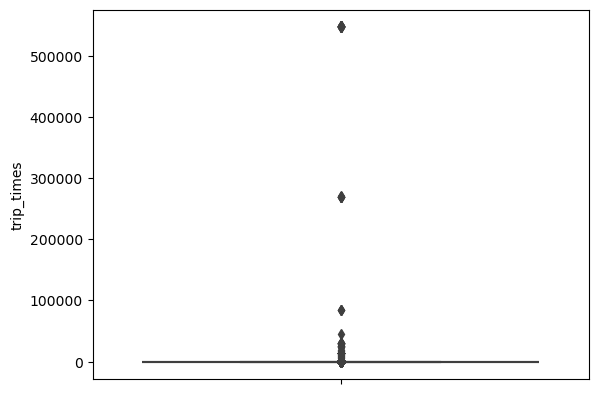

In [7]:
sns.boxplot(y="trip_times", data =new_frame)
plt.show()

In [9]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
for i in range(0,100,5):
    var =new_frame["trip_times"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

0 percentile value is -1211.0166666666667
5 percentile value is 2.85
10 percentile value is 3.8333333333333335
15 percentile value is 4.633333333333334
20 percentile value is 5.383333333333334
25 percentile value is 6.1
30 percentile value is 6.816666666666666
35 percentile value is 7.55
40 percentile value is 8.316666666666666
45 percentile value is 9.1
50 percentile value is 9.95
55 percentile value is 10.866666666666667
60 percentile value is 11.866666666666667
65 percentile value is 13.0
70 percentile value is 14.283333333333333
75 percentile value is 15.8
80 percentile value is 17.633333333333333
85 percentile value is 20.016666666666666
90 percentile value is 23.45
95 percentile value is 29.583333333333332
100 percentile value is  548555.6333333333


In [10]:
for i in range(95,100):
    var =new_frame["trip_times"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

95 percentile value is 29.583333333333332
96 percentile value is 31.683333333333334
97 percentile value is 34.483333333333334
98 percentile value is 38.71666666666667
99 percentile value is 46.766666666666666
100 percentile value is  548555.6333333333


In [12]:
#removing data based on our analysis and TLC regulations
new_frame_1=new_frame[(new_frame.trip_times>1) & (new_frame.trip_times<720)]

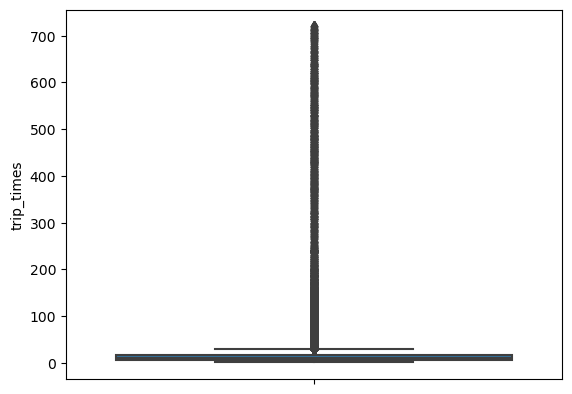

In [13]:
#box-plot after removal of outliers
sns.boxplot(y="trip_times", data =new_frame_1)
plt.show()

/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


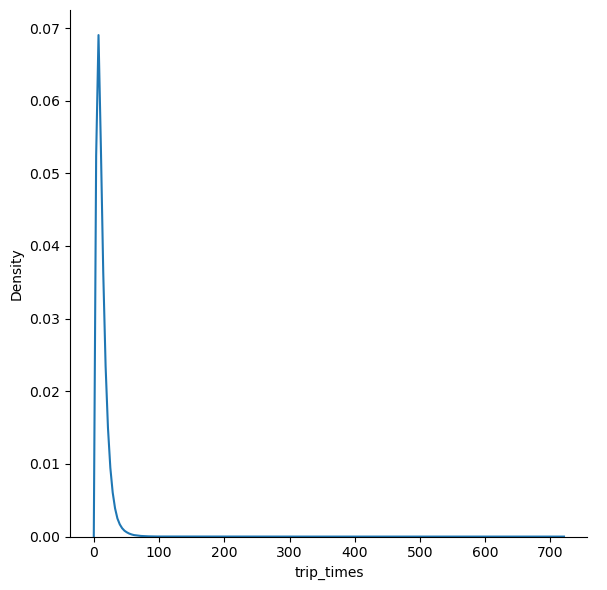

In [14]:
#pdf of trip-times after removing the outliers
sns.FacetGrid(new_frame_1,height=6) \
      .map(sns.kdeplot,"trip_times") \
      .add_legend();
plt.show();

In [16]:
#converting the values to log-values to chec for log-normal
import math
new_frame_1['log_times']=[math.log(i) for i in new_frame_1['trip_times'].values]

/var/folders/z0/h3tw1q0x23n78k5s9bv1b7wc0000gn/T/ipykernel_41623/3501821937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_frame_1['log_times']=[math.log(i) for i in new_frame_1['trip_times'].values]


/opt/anaconda3/envs/Tensorflow/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


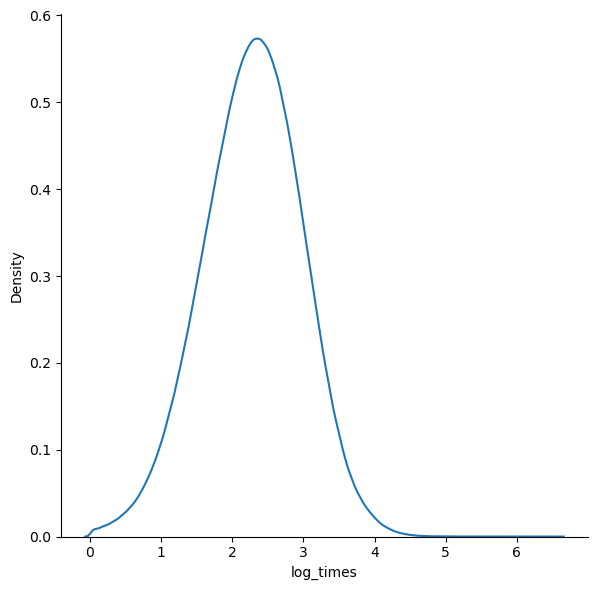

In [17]:
#pdf of log-values
sns.FacetGrid(new_frame_1,height=6) \
      .map(sns.kdeplot,"log_times") \
      .add_legend();
plt.show();

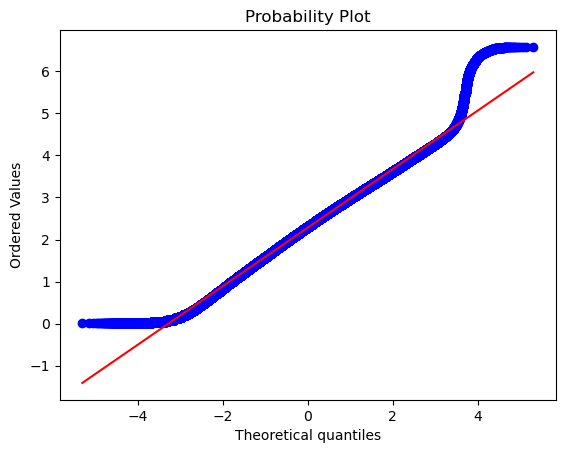

In [19]:
#Q-Q plot for checking if trip-times follow normality
import scipy
scipy.stats.probplot(new_frame_1['log_times'].values, plot=plt)
plt.show()

<h3> Speed Analysis </h3>

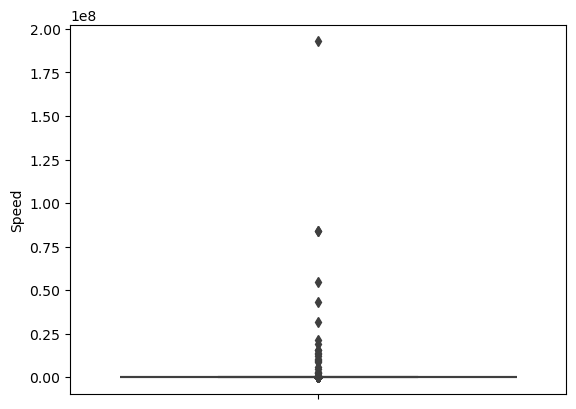

In [21]:
# check for any outliers in the data after trip duration outliers removed
# box-plot for speeds with outliers
sns.boxplot(y="Speed", data = new_frame_1)
plt.show()

In [23]:
#calculating speed values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =new_frame_1["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0.0
10 percentile value is 6.4125000000000005
20 percentile value is 7.811836115326251
30 percentile value is 8.930891907855878
40 percentile value is 9.981818181818182
50 percentile value is 11.069999999999999
60 percentile value is 12.287425149700601
70 percentile value is 13.797665369649806
80 percentile value is 15.964523281596454
90 percentile value is 20.188235294117646
100 percentile value is  192857142.85714287


In [24]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var =new_frame_1["Speed"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 35.75057736720555
99.1 percentile value is 36.30984400215169
99.2 percentile value is 36.913319238900634
99.3 percentile value is 37.58672009158557
99.4 percentile value is 38.32894736842106
99.5 percentile value is 39.17355371900827
99.6 percentile value is 40.151140065146585
99.7 percentile value is 41.33464180569185
99.8 percentile value is 42.86187845303868
99.9 percentile value is 45.29960053262316
100 percentile value is  192857142.85714287


In [25]:
#removing further outliers based on the 99.9th percentile value
new_frame_1=new_frame_1[(new_frame_1.Speed>0) & (new_frame_1.Speed<45.31)]

In [26]:
#avg.speed of cabs in New-York
sum(new_frame_1["Speed"]) / float(len(new_frame_1["Speed"]))

12.45249702018204

<h3> We then follow the exact same procedure for feature name : <b> Trip Distance </h3>

<h3> <b> Total Fare <b> </h3>

In [27]:
#calculating total fare amount values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    var = new_frame_1["total_amount"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 66.6
99.1 percentile value is 68.13
99.2 percentile value is 69.6
99.3 percentile value is 69.6
99.4 percentile value is 69.73
99.5 percentile value is 69.76
99.6 percentile value is 71.3
99.7 percentile value is 72.66
99.8 percentile value is 78.05
99.9 percentile value is 92.65
100 percentile value is  3950611.6


<b>Observation:-</b> As even the 99.9th percentile value doesnt look like an outlier,as there is not much difference between the 99.8th percentile and 99.9th percentile, we move on to do graphical analyis

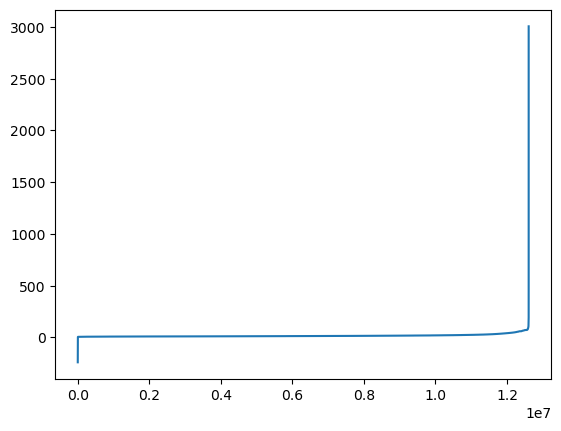

In [29]:
#below plot shows us the fare values(sorted) to find a sharp increase to remove those values as outliers
# plot the fare amount excluding last two values in sorted data
plt.plot(var[:-2])
plt.show()

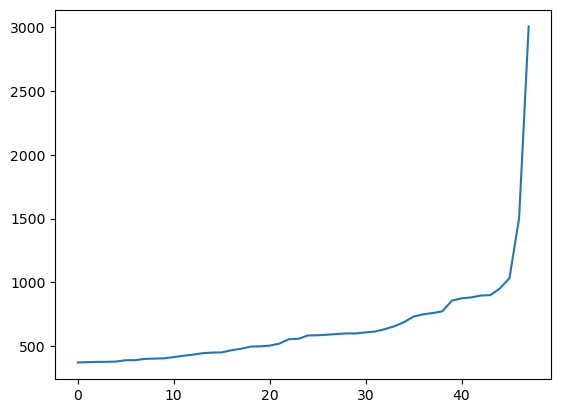

In [30]:
#now looking at values not including the last two points we again find a drastic increase at around 1000 fare value
# we plot last 50 values excluding last two values
plt.plot(var[-50:-2])
plt.show()

<h2> <b> Removing all outliers <b> </h2>

In [31]:
#removing all outliers based on our univariate analysis above
def remove_outliers(new_frame):

    
    a = new_frame.shape[0]
    print ("Number of pickup records = ",a)
    temp_frame = new_frame[((new_frame.DOLocationID < 264) & (new_frame.PULocationID < 264))]
    b = temp_frame.shape[0]
    print ("Number of outlier coordinates lying outside NY boundaries:",(a-b))

    
    temp_frame = new_frame[(new_frame.trip_times > 0) & (new_frame.trip_times < 720)]
    c = temp_frame.shape[0]
    print ("Number of outliers from trip times analysis:",(a-c))
    
    
    temp_frame = new_frame[(new_frame.trip_distance > 0) & (new_frame.trip_distance < 23)]
    d = temp_frame.shape[0]
    print ("Number of outliers from trip distance analysis:",(a-d))
    
    temp_frame = new_frame[(new_frame.Speed <= 65) & (new_frame.Speed >= 0)]
    e = temp_frame.shape[0]
    print ("Number of outliers from speed analysis:",(a-e))
    
    temp_frame = new_frame[(new_frame.total_amount <1000) & (new_frame.total_amount >0)]
    f = temp_frame.shape[0]
    print ("Number of outliers from fare analysis:",(a-f))
    
    
    new_frame = new_frame[((new_frame.DOLocationID < 264) & (new_frame.PULocationID < 264))]
    
    new_frame = new_frame[(new_frame.trip_times > 0) & (new_frame.trip_times < 720)]
    new_frame = new_frame[(new_frame.trip_distance > 0) & (new_frame.trip_distance < 23)]
    new_frame = new_frame[(new_frame.Speed < 45.31) & (new_frame.Speed > 0)]
    new_frame = new_frame[(new_frame.total_amount <1000) & (new_frame.total_amount >0)]
    
    print ("Total outliers removed",a - new_frame.shape[0])
    print ("---")
    return new_frame

In [33]:
print ("Removing outliers in the month of Jan-2015")
print ("----")
new_frame_2 = remove_outliers(new_frame)
print("fraction of data points that remain after removing outliers", float(len(new_frame_2))/len(new_frame))

Removing outliers in the month of Jan-2015
----
Number of pickup records =  12741035
Number of outlier coordinates lying outside NY boundaries: 290547
Number of outliers from trip times analysis: 23253
Number of outliers from trip distance analysis: 86624
Number of outliers from speed analysis: 23715
Number of outliers from fare analysis: 4423
Total outliers removed 368913
---
fraction of data points that remain after removing outliers 0.9710452879220566


In [34]:
new_frame_2.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount,trip_times,pickup_times,Speed
0,1,1.0,41,166,8.40,5.250000,1.420071e+09,11.428571
1,1,0.9,166,238,7.30,5.933333,1.420072e+09,9.101124
2,1,3.5,238,162,17.40,14.783333,1.420072e+09,14.205186
3,1,2.1,162,263,11.87,7.900000,1.420073e+09,15.949367
4,1,1.0,236,141,7.30,6.050000,1.420074e+09,9.917355


<h2> <b> Uploading Zone lookup table and alligning it with PULocation ID and DOLocationID </b></h3>

In [35]:
zone_lookup=pd.read_csv('/Users/pinakshome/Downloads/taxi_zone_lookup.csv')

In [36]:
zone_lookup.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [37]:
# Performing the merge to map PULocationID and DOLocationID to their respective zones
# First, we'll create dictionaries from the zone lookup table for quick mapping
pu_location_to_zone = dict(zip(zone_lookup.LocationID, zone_lookup.Zone))
do_location_to_zone = pu_location_to_zone  # The same mapping applies for dropoff

# Now, mapping the zones using the dictionaries
new_frame_2['Pickup Zone'] = new_frame_2['PULocationID'].map(pu_location_to_zone)
new_frame_2['Dropoff Zone'] = new_frame_2['DOLocationID'].map(do_location_to_zone)

# Displaying the updated main dataframe with 'Pickup Zone' and 'Dropoff Zone' columns
new_frame_2


,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount,trip_times,pickup_times,Speed,Pickup Zone,Dropoff Zone
0,1,1.0,41,166,8.40,5.250000,1.420071e+09,11.428571,Central Harlem,Morningside Heights
1,1,0.9,166,238,7.30,5.933333,1.420072e+09,9.101124,Morningside Heights,Upper West Side North
2,1,3.5,238,162,17.40,14.783333,1.420072e+09,14.205186,Upper West Side North,Midtown East
3,1,2.1,162,263,11.87,7.900000,1.420073e+09,15.949367,Midtown East,Yorkville West
4,1,1.0,236,141,7.30,6.050000,1.420074e+09,9.917355,Upper East Side North,Lenox Hill West
...,...,...,...,...,...,...,...,...,...,...
12741030,1,1.6,90,249,11.62,9.300000,1.422747e+09,10.322581,Flatiron,West Village
12741031,1,0.6,90,68,8.76,6.816667,1.422748e+09,5.281174,Flatiron,East Chelsea
12741032,1,3.0,68,148,20.37,21.483333,1.422749e+09,8.378588,East Chelsea,Lower East Side
12741033,1,6.9,189,237,39.80,46.700000,1.422746e+09,8.865096,Prospect Heights,Upper East Side South


<h3> <b> Time Binning <b> </h3>

In [38]:
def add_pickup_bins(frame,month,year):
    unix_pickup_times=[i for i in frame['pickup_times'].values]
    unix_times = [[1420070400,1422748800,1425168000,1427846400,1430438400,1433116800],\
                    [1451606400,1454284800,1456790400,1459468800,1462060800,1464739200]]
    
    start_pickup_unix=unix_times[year-2015][month-1]
    # https://www.timeanddate.com/time/zones/est
    # (int((i-start_pickup_unix)/600)+33) : our unix time is in gmt to we are converting it to est
    tenminutewise_binned_unix_pickup_times=[(int((i-start_pickup_unix)/600)+33) for i in unix_pickup_times]
    frame['pickup_bins'] = np.array(tenminutewise_binned_unix_pickup_times)
    return frame

In [39]:
J_15 = add_pickup_bins(new_frame_2,1,2015)

In [40]:
J_15.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount,trip_times,pickup_times,Speed,Pickup Zone,Dropoff Zone,pickup_bins
0,1,1.0,41,166,8.40,5.250000,1.420071e+09,11.428571,Central Harlem,Morningside Heights,34
1,1,0.9,166,238,7.30,5.933333,1.420072e+09,9.101124,Morningside Heights,Upper West Side North,34
2,1,3.5,238,162,17.40,14.783333,1.420072e+09,14.205186,Upper West Side North,Midtown East,35
3,1,2.1,162,263,11.87,7.900000,1.420073e+09,15.949367,Midtown East,Yorkville West,37
4,1,1.0,236,141,7.30,6.050000,1.420074e+09,9.917355,Upper East Side North,Lenox Hill West,38


In [45]:
min(J_15['pickup_bins'].unique())

33

In [48]:
J_15 = J_15.drop(['Dropoff Zone'],axis=1)

In [49]:
J_15.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount,trip_times,pickup_times,Speed,Pickup Zone,pickup_bins
0,1,1.0,41,166,8.40,5.250000,1.420071e+09,11.428571,Central Harlem,34
1,1,0.9,166,238,7.30,5.933333,1.420072e+09,9.101124,Morningside Heights,34
2,1,3.5,238,162,17.40,14.783333,1.420072e+09,14.205186,Upper West Side North,35
3,1,2.1,162,263,11.87,7.900000,1.420073e+09,15.949367,Midtown East,37
4,1,1.0,236,141,7.30,6.050000,1.420074e+09,9.917355,Upper East Side North,38


<h3> Assigning a unique number for Pickup Zones</h3>

In [50]:
# Assigning a unique number for each unique pickup zone
J_15['Pickup_Zone_Number'], unique_zones = pd.factorize(J_15['Pickup Zone'])
print("Mapping of Pickup Zones to IDs:", dict(zip(unique_zones, range(len(unique_zones)))))

Mapping of Pickup Zones to IDs: {'Central Harlem': 0, 'Morningside Heights': 1, 'Upper West Side North': 2, 'Midtown East': 3, 'Upper East Side North': 4, 'Upper West Side South': 5, 'Flatiron': 6, 'Hudson Sq': 7, 'West Chelsea/Hudson Yards': 8, 'Yorkville West': 9, 'Midtown Center': 10, 'Midtown South': 11, 'Financial District South': 12, 'Meatpacking/West Village West': 13, 'Manhattan Valley': 14, 'Lincoln Square East': 15, 'Clinton West': 16, 'Battery Park City': 17, 'East Village': 18, 'Gramercy': 19, 'TriBeCa/Civic Center': 20, 'Upper East Side South': 21, 'Clinton East': 22, 'Sunset Park West': 23, 'Lenox Hill West': 24, 'Kips Bay': 25, 'Murray Hill': 26, 'Manhattanville': 27, 'Washington Heights South': 28, 'Hamilton Heights': 29, 'SoHo': 30, 'Sunnyside': 31, 'Astoria': 32, 'East Chelsea': 33, 'UN/Turtle Bay South': 34, 'Bloomingdale': 35, 'Times Sq/Theatre District': 36, 'Lincoln Square West': 37, 'Old Astoria': 38, 'Union Sq': 39, 'Sutton Place/Turtle Bay North': 40, 'Penn Sta

In [56]:
J_15.head()

,passenger_count,trip_distance,PULocationID,DOLocationID,total_amount,trip_times,pickup_times,Speed,Pickup Zone,pickup_bins,Pickup_Zone_Number
0,1,1.0,41,166,8.40,5.250000,1.420071e+09,11.428571,Central Harlem,34,0
1,1,0.9,166,238,7.30,5.933333,1.420072e+09,9.101124,Morningside Heights,34,1
2,1,3.5,238,162,17.40,14.783333,1.420072e+09,14.205186,Upper West Side North,35,2
3,1,2.1,162,263,11.87,7.900000,1.420073e+09,15.949367,Midtown East,37,3
4,1,1.0,236,141,7.30,6.050000,1.420074e+09,9.917355,Upper East Side North,38,4


In [58]:
jan_2015_groupby = J_15[['Pickup_Zone_Number','pickup_bins','trip_distance']].groupby(['Pickup_Zone_Number','pickup_bins']).count()

In [59]:
# hear the trip_distance represents the number of pickups that are happend in that particular 10min intravel
# this data frame has two indices
# primary index: pickup_cluster (cluster number)
# secondary index : pickup_bins (we devid whole months time into 10min intravels 24*31*60/10 =4464bins)
jan_2015_groupby.head()

trip_distance
Pickup_Zone_Number pickup_bins               
0                  33                      11
                   34                       9
                   35                      24
                   36                      38
                   37                      42

<h4> Adding in Feb and March 2015 Data </h4>

In [60]:
df2=dd.read_parquet('/Users/pinakshome/Downloads/yellow_tripdata_2015-02.parquet', engine='pyarrow')
df3=df=dd.read_parquet('/Users/pinakshome/Downloads/yellow_tripdata_2015-03.parquet', engine='pyarrow')

<h3> Data Preparation Function to accomodate all analysis so far</h3>

In [67]:
def datapreparation(month,month_no,year_no):
    
    print ("Return with trip times..")

    frame_with_durations = return_with_trip_times(month)
    
    print ("Remove outliers..")
    frame_with_durations_outliers_removed = remove_outliers(frame_with_durations)

    # Now, mapping the zones using the dictionaries
    frame_with_durations_outliers_removed['Pickup Zone'] = frame_with_durations_outliers_removed['PULocationID'].map(pu_location_to_zone)
    frame_with_durations_outliers_removed['Dropoff Zone'] = frame_with_durations_outliers_removed['DOLocationID'].map(do_location_to_zone)
    frame_with_durations_outliers_removed['Pickup_Zone_Number'], unique_zones = pd.factorize(frame_with_durations_outliers_removed['Pickup Zone'])
    print ("Final groupbying..")
    final_updated_frame = add_pickup_bins(frame_with_durations_outliers_removed,month_no,year_no)
    final_groupby_frame = final_updated_frame[['Pickup_Zone_Number','pickup_bins','trip_distance']].groupby(['Pickup_Zone_Number','pickup_bins']).count()
    
    return final_updated_frame,final_groupby_frame

In [68]:
j152, j152G = datapreparation(df2,2,2015)
j153, j153G=  datapreparation(df3,3,2015)

Return with trip times..


/var/folders/z0/h3tw1q0x23n78k5s9bv1b7wc0000gn/T/ipykernel_41623/2137877124.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_frame.rename(columns={'pickup_unix': 'pickup_times'}, inplace=True)


Remove outliers..
Number of pickup records =  12442394
Number of outlier coordinates lying outside NY boundaries: 294246
Number of outliers from trip times analysis: 23483
Number of outliers from trip distance analysis: 84509
Number of outliers from speed analysis: 24719
Number of outliers from fare analysis: 4575
Total outliers removed 367428
---
Final groupbying..
Return with trip times..


/var/folders/z0/h3tw1q0x23n78k5s9bv1b7wc0000gn/T/ipykernel_41623/2137877124.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_frame.rename(columns={'pickup_unix': 'pickup_times'}, inplace=True)


Remove outliers..
Number of pickup records =  13342951
Number of outlier coordinates lying outside NY boundaries: 302252
Number of outliers from trip times analysis: 25504
Number of outliers from trip distance analysis: 95635
Number of outliers from speed analysis: 26898
Number of outliers from fare analysis: 4982
Total outliers removed 384447
---
Final groupbying..


<h2> <b> We Do this similarly for our test data <b> </h2>

In [70]:
df4=dd.read_parquet('/Users/pinakshome/Downloads/yellow_tripdata_2016-01.parquet', engine='pyarrow')
df5=df=dd.read_parquet('/Users/pinakshome/Downloads/yellow_tripdata_2016-02.parquet', engine='pyarrow')
df6=dd.read_parquet('/Users/pinakshome/Downloads/yellow_tripdata_2016-03.parquet', engine='pyarrow')

In [71]:
j161, j161G = datapreparation(df4,1,2016)
j162, j162G=  datapreparation(df5,2,2016)
j163, j163G = datapreparation(df6,3,2016)

Return with trip times..


/var/folders/z0/h3tw1q0x23n78k5s9bv1b7wc0000gn/T/ipykernel_41623/2137877124.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_frame.rename(columns={'pickup_unix': 'pickup_times'}, inplace=True)


Remove outliers..
Number of pickup records =  10905067
Number of outlier coordinates lying outside NY boundaries: 211471
Number of outliers from trip times analysis: 27122
Number of outliers from trip distance analysis: 78488
Number of outliers from speed analysis: 20968
Number of outliers from fare analysis: 4664
Total outliers removed 292881
---
Final groupbying..
Return with trip times..


/var/folders/z0/h3tw1q0x23n78k5s9bv1b7wc0000gn/T/ipykernel_41623/2137877124.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_frame.rename(columns={'pickup_unix': 'pickup_times'}, inplace=True)


Remove outliers..
Number of pickup records =  11375412
Number of outlier coordinates lying outside NY boundaries: 218096
Number of outliers from trip times analysis: 27554
Number of outliers from trip distance analysis: 77091
Number of outliers from speed analysis: 22099
Number of outliers from fare analysis: 4821
Total outliers removed 298359
---
Final groupbying..
Return with trip times..


/var/folders/z0/h3tw1q0x23n78k5s9bv1b7wc0000gn/T/ipykernel_41623/2137877124.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_frame.rename(columns={'pickup_unix': 'pickup_times'}, inplace=True)


Remove outliers..
Number of pickup records =  12203824
Number of outlier coordinates lying outside NY boundaries: 226304
Number of outliers from trip times analysis: 30729
Number of outliers from trip distance analysis: 82262
Number of outliers from speed analysis: 23603
Number of outliers from fare analysis: 5059
Total outliers removed 313567
---
Final groupbying..
